In [30]:
!pip install pandas scikit-learn tensorflow matplotlib seaborn

In [31]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
import numpy as np

In [32]:
data = pd.read_csv("cosmicclassifierTraining.csv")
scaler = MinMaxScaler(feature_range=(-1, 1))
data.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0


In [33]:
print(data.isnull().sum())

Atmospheric Density              2984
Surface Temperature              3032
Gravity                          2984
Water Content                    3077
Mineral Abundance                2921
Orbital Period                   2997
Proximity to Star                2945
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index    2942
Prediction                       3039
dtype: int64


In [34]:
data = data.dropna(subset=['Prediction'])
data

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.316003,-1.160519,0.544548,-1.407123,1.427861,0.849849,-1.932329,Category_8,Category_5,1.333760,8.0
59996,0.789506,-2.645345,-0.375569,-2.579966,0.783195,0.671547,-2.041189,Category_14,Category_4,0.170505,3.0
59997,-0.662563,0.642230,-1.175106,-2.783240,-0.902704,-1.694373,-1.824274,Category_8,Category_8,1.010311,5.0
59998,0.475118,-0.021458,2.086274,1.444825,-1.986595,-2.113147,-0.348915,Category_11,Category_9,-0.665345,6.0


In [35]:
import re

def category_to_number(val):
    """Converts 'Category_X' to its numeric value X"""
    if isinstance(val, str) and val.startswith("Category_"):
        return int(re.search(r'\d+', val).group())
    return val

In [36]:
data = data.applymap(category_to_number)

<ipython-input-36-3ac3781f4a33>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(category_to_number)


In [37]:
data.fillna(data.median(), inplace=True)

In [38]:
data

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,-0.329290,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,9.0,6.0,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,9.0,9.0,0.050243,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,9.0,8.0,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,9.0,11.0,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,6.0,10.0,0.407941,9.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.316003,-1.160519,0.544548,-1.407123,1.427861,0.849849,-1.932329,8.0,5.0,1.333760,8.0
59996,0.789506,-2.645345,-0.375569,-2.579966,0.783195,0.671547,-2.041189,14.0,4.0,0.170505,3.0
59997,-0.662563,0.642230,-1.175106,-2.783240,-0.902704,-1.694373,-1.824274,8.0,8.0,1.010311,5.0
59998,0.475118,-0.021458,2.086274,1.444825,-1.986595,-2.113147,-0.348915,11.0,9.0,-0.665345,6.0


In [39]:
data[["Magnetic Field Strength"]] = scaler.fit_transform(data[["Magnetic Field Strength"]])

In [40]:
data[["Radiation Levels"]] = scaler.fit_transform(data[["Radiation Levels"]])

In [41]:
data

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,-0.329290,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,-0.157895,-0.473684,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,-0.157895,-0.157895,0.050243,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,-0.157895,-0.263158,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,-0.157895,0.052632,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,-0.473684,-0.052632,0.407941,9.0
...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.316003,-1.160519,0.544548,-1.407123,1.427861,0.849849,-1.932329,-0.263158,-0.578947,1.333760,8.0
59996,0.789506,-2.645345,-0.375569,-2.579966,0.783195,0.671547,-2.041189,0.368421,-0.684211,0.170505,3.0
59997,-0.662563,0.642230,-1.175106,-2.783240,-0.902704,-1.694373,-1.824274,-0.263158,-0.263158,1.010311,5.0
59998,0.475118,-0.021458,2.086274,1.444825,-1.986595,-2.113147,-0.348915,0.052632,-0.157895,-0.665345,6.0


<Axes: >

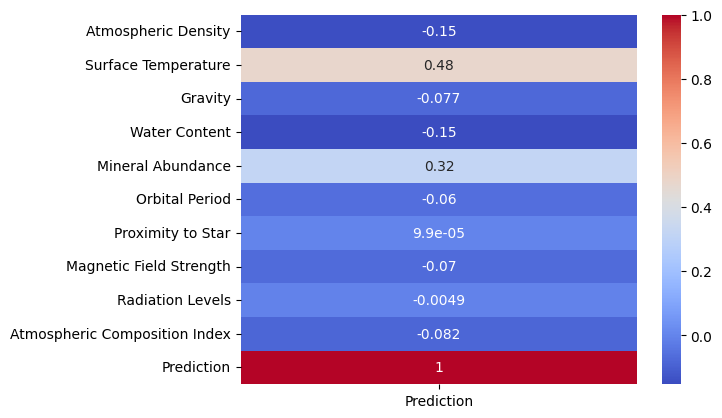

In [42]:
sns.heatmap(data.corr()[["Prediction"]], annot=True, cmap='coolwarm')

In [43]:
train_data, test_data = train_test_split(data, test_size=0.75, random_state=42)

In [44]:
X_train = train_data.drop("Prediction", axis=1)
y_train = train_data["Prediction"]
X_test = test_data.drop("Prediction", axis=1)
y_test = test_data["Prediction"]

In [45]:
model = Sequential()
model.add(Dense(10))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer="glorot_uniform"))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dense(128,kernel_initializer="glorot_uniform"))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dense(64,kernel_initializer="glorot_uniform"))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor="val_accuracy",patience=30,restore_best_weights=True)

In [47]:
model.fit(X_train, y_train, epochs=1000, batch_size=1024, validation_split=0.2, callbacks=[earlystopping])

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.3948 - loss: 1.9348 - val_accuracy: 0.5204 - val_loss: 1.8515
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7029 - loss: 0.8913 - val_accuracy: 0.6088 - val_loss: 1.7028
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7561 - loss: 0.7605 - val_accuracy: 0.6204 - val_loss: 1.6252
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7758 - loss: 0.6842 - val_accuracy: 0.6215 - val_loss: 1.5822
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7955 - loss: 0.6186 - val_accuracy: 0.6180 - val_loss: 1.5391
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8018 - loss: 0.5887 - val_accuracy: 0.6166 - val_loss: 1.5108
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8074 - loss: 0.5676 - val_accuracy: 0.6106 - val_loss: 1.4754
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8180 - loss: 0.5392 - val_ac

In [61]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

1336/1336 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [62]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.8631352262353409


In [63]:
testData = pd.read_csv("cosmictest.csv")

In [64]:
testData.shape

(10000, 10)

In [65]:
testData = testData.applymap(category_to_number)

<ipython-input-65-0a37bdc6611e>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  testData = testData.applymap(category_to_number)


In [66]:
testData.fillna(testData.median(), inplace=True)

In [67]:
testData[["Magnetic Field Strength"]] = scaler.fit_transform(testData[["Magnetic Field Strength"]])
testData[["Radiation Levels"]] = scaler.fit_transform(testData[["Radiation Levels"]])
testData[["Atmospheric Density"]] = scaler.fit_transform(testData[["Atmospheric Density"]])
testData[["Surface Temperature"]] = scaler.fit_transform(testData[["Surface Temperature"]])
testData[["Gravity"]] = scaler.fit_transform(testData[["Gravity"]])
testData[["Water Content"]] = scaler.fit_transform(testData[["Water Content"]])
testData[["Mineral Abundance"]] = scaler.fit_transform(testData[["Mineral Abundance"]])
testData[["Orbital Period"]] = scaler.fit_transform(testData[["Orbital Period"]])
testData[["Proximity to Star"]] = scaler.fit_transform(testData[["Proximity to Star"]])
testData[["Magnetic Field Strength"]] = scaler.fit_transform(testData[["Magnetic Field Strength"]])
testData[["Radiation Levels"]] = scaler.fit_transform(testData[["Radiation Levels"]])
testData[["Atmospheric Composition Index"]] = scaler.fit_transform(testData[["Atmospheric Composition Index"]])

In [68]:
rest = model.predict(testData)
predicted_labels = np.argmax(rest, axis=1)
print(predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7 8 8 ... 8 3 6]


In [ ]:
def map_to_numbers(arr):
    names = [
        "Bewohnbar",
        "Terraformierbar",
        "Rohstoffreich",
        "Wissenschaftlich",
        "Gasriese",
        "Wüstenplanet",
        "Eiswelt",
        "Toxischetmosäre",
        "Hohestrahlung",
        "Toterahswelt"
    ]
    mapped_array = [names[i] for i in arr if 0 <= i < len(names)]

    results_df = pd.DataFrame(testData)
    results_df['Predictions'] = arr
    results_df['Predicted Labels'] = mapped_array

    column_order = [col for col in results_df.columns if col not in ['Predictions', 'Predicted Labels']] + ['Predictions', 'Predicted Labels']
    results_df = results_df[column_order]

    results_df.to_csv('output/model_predictions.csv', index=False)

    print("Predictions saved to 'output/model_predictions.csv'")

map_to_numbers(predicted_labels)


Predictions saved to 'model_predictions.csv'
